# Neural Networks - A Practical Introduction
by _Minho Menezes_  

---

## Neural Networks - Learning

### Libraries

In [1]:
## LIBRARIES ##
import numpy as np                         # Library for Numerical and Matricial Operations
import matplotlib.pyplot as plt            # Library for Generating Visualizations
from mpl_toolkits.mplot3d import Axes3D    # Library for Generating 3D Visualizations
import pandas as pd                        # Library for Handling Datasets

### Dataset

In [2]:
## CARREGANDO E PRÉ-PROCESSANDO OS DADOS ##
# Carregando os dados a partir do arquivo .csv
data = pd.read_csv("data/toy_data_01.csv")

# Armazenando as dimensões dos dados
m = data.shape[0]
n = data.shape[1]-1

# Transformando as Classes em Números
data["Class"] = data["Class"].astype('category').cat.codes

# Separação do Conjunto de Treino e Conjunto de Teste
np.random.seed(2)
trainingSize = int(0.8 * m)
indexes = np.random.randint(0, m, m)

trainData = data.iloc[indexes[:trainingSize]]
testData = data.iloc[indexes[trainingSize:]]

# Obtendo matrizes (formato Numpy) correspondentes
X_train = trainData.iloc[:,:-1].values.T
y_train = trainData.iloc[:, -1].values.T

X_test = testData.iloc[:,:-1].values.T
y_test = testData.iloc[:, -1].values.T

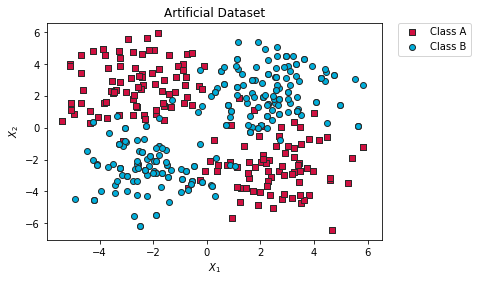

In [3]:
## VISUALIZAÇÃO CONDICIONADA COM O MATPLOTLIB E NUMPY ##
plt.figure()

a_class = np.where(y_train == 1)
b_class = np.where(y_train == 0)

plt.title("Artificial Dataset"); plt.xlabel("$X_1$"); plt.ylabel("$X_2$")

plt.scatter(X_train[0,a_class], X_train[1,a_class], marker="s", color="#d11141", edgecolor="#2A2A2A", label="Class A")
plt.scatter(X_train[0,b_class], X_train[1,b_class], marker="o", color="#00aedb", edgecolor="#2A2A2A", label="Class B")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Neural Network Class

In [4]:
## CLASS: Multilayer Perceptron ##
class MultilayerPerceptron:
    
    # CLASS CONSTRUCTOR
    def __init__(self, n_neurons=[2, 5, 1]):
        if(len(n_neurons) < 2):
            raise ValueError("The network must have at least two layers! (The input and the output layers)")
        
        # Network Architecture
        self.hidden_layers = len(n_neurons)-2
        self.n_neurons = n_neurons
        self.W = []
        
        # Adjusting the Network architecture
        for i in range(1, len(n_neurons)):
            self.W.append( np.random.randn(self.n_neurons[i-1]+1 , self.n_neurons[i]) )
        
    # ACTIVATION FUNCTION
    def activate(self,Z):
        return 1 / (1 + np.exp(-Z))
    
    # FORWARD PROPAGATION
    def forward(self, X):
        # Activation List
        A = []
        
        # Input Layer Activation
        A.append( np.vstack([np.ones([1, X.shape[1]]), X]) )
        
        # Hidden Layer Activation
        for i in range(0, self.hidden_layers):
            Z = np.matmul(self.W[i].T, A[-1])
            Z = self.activate(Z)
            
            A.append( np.vstack([np.ones([1, Z.shape[1]]), Z]) )
        
        # Output Layer Activation
        Z = np.matmul(self.W[-1].T, A[-1])
        Z = self.activate(Z)

        A.append(Z)
        
        return A
    
    # BACKPROPAGATION
    def backpropagate(self, A, y):
        pass
    
    # GRADIENT DESCENT TRAINING
    def train(self, X_train, y_train, X_test, y_test, alpha=1e-3, maxIt=50000, tol=1e-5, verbose=False):
        pass
        
## ---------------------------- ##

a

In [5]:
def backpropagate(self, A, y):
    # A primeira matriz de erros é calculada diretamente da diferença entre a classe real e a prevista
    E = []
    E.append( A[-1] - y )

    # O erro é, então, propagado para trás até termos os erros da primeira Camada oculta
    for i in range(self.hidden_layers, 0, -1):
        E.append( np.matmul(self.W[i], E[-1]) * A[i] * (1-A[i]) )
        E[-1] = E[-1][1:,:]
        
    # Retornamos o erro calculado em todas as camadas, na ordem inversa do cálculo
    return E[::-1]

MultilayerPerceptron.backpropagate = backpropagate

In [6]:
X = np.array([[ 5,  1, -2],
              [ 4,  2,  0],
              [ 3,  3,  1],
              [ 2,  4, -1]])    

y = np.array([[1, 1, 0]])

# Cálculo da Ativação e dos Erros da Rede Neural
brain = MultilayerPerceptron(n_neurons=[4, 5, 1])

A = brain.forward(X)
E = brain.backpropagate(A,y)

# Visualização dos Resultados
print("# Resultado dos Erros da Rede Neural #")
print("Erro na Camada Oculta:\n", E[0])
print("\nErro na Camada de Saída:\n", E[1])

# Resultado dos Erros da Rede Neural #
Erro na Camada Oculta:
 [[  2.14486020e-04   1.52251064e-01  -4.09911401e-02]
 [  2.11920334e-02   5.55507672e-03  -3.61121706e-03]
 [  7.89374898e-05   1.04062041e-03  -1.85806433e-03]
 [  1.55607773e-03   4.07513489e-02  -1.17067861e-03]
 [ -3.77537307e-02  -1.17922509e-02   1.61314367e-02]]

Erro na Camada de Saída:
 [[-0.53599213 -0.67818578  0.18183388]]


treino

In [6]:
###############################
#    Treinamento do MLP    #
###############################
def train(self, X_train, y_train, alpha=1e-3, maxIt=50000, tol=1e-5, verbose=False):
    # Define o Histórico de Erros e algumas variáveis auxiliares
    errorHist = []
    previousMSE = 0
    
    # Realiza o treino por Gradiente Descendente
    for it in range(0, maxIt):
        # 1. Calculamos a ativação de todos os neurônios (Forward Propagation) e 
        #    retropropagamos o erro da predição (Backpropagation)
        A = self.forward(X_train)
        E = self.backpropagate(A, y_train)
        
        # 2. Calculamos o erro MSE, a acurácia do modelo e adicionamos o resultado no histórico.
        actualMSE = (1/m) * np.sum(E[-1]**2)
        actualAcc = 1
        errorHist.append(actualMSE)
        
        # 3. Realizamos o passo do Gradiente Descendente.        
        for i in range(0, self.hidden_layers+1):
            self.W[i] = self.W[i] - (alpha/m) * np.matmul(A[i], E[i].T)
        
        # 4. Imprimimos o resultado do treinamento a cada 50 épocas.
        if(it % 50 == 0 and verbose): 
            print("## Iteration", it, "##")
            print("MSE: \t", actualMSE)
            print("Accuracy: {0:.3f}%".format(1))
            print("Weights\nS -> H:\n", self.W[0], "\nH -> O:\n", self.W[1])
            print("\n")
        
        # 5. Verificamos uma possivel convergência do treinamento, e então encerramos o laço.
        if(abs(actualMSE - previousMSE) <= tol):
            print("!!! Convergence reached !!!")
            print("## Iteration", it, "##")
            print("MSE: \t", actualMSE)
            print("Accuracy: {0:.3f}%".format(1))
            print("Weights\nS -> H:\n", self.W[0], "\nH -> O:\n", self.W[1])
            print("\n")
            break;
            
        # 6. Atualizamos as variáveis auxiliares para as próximas iterações.
        previousMSE = actualMSE
    
    # Fim do Treinamento
    return errorHist

MultilayerPerceptron.train = train

In [7]:
brain = MultilayerPerceptron(n_neurons=[2,100,1])
errorHist = brain.train(X_train, y_train, alpha=0.1)

!!! Convergence reached !!!
## Iteration 523 ##
MSE: 	 0.0423941150401
Accuracy: 1.000%
Weights
S -> H:
 [[ -8.84770324e-01  -5.24259039e-01   1.04514828e+00   1.45366924e+00
   -4.95022456e-01  -4.94343723e-01  -1.55013853e-01  -6.23547044e-01
   -9.84547580e-01  -1.21267955e-01  -1.87625081e+00  -2.71342898e-01
   -1.05599535e+00  -4.93482731e-01  -8.52212476e-02   5.33216323e-01
    2.18556927e-02  -1.33358923e-01   8.18810204e-01   8.77661171e-01
    1.20829260e+00   1.12895442e+00  -5.40289282e-01  -1.32417456e+00
   -1.04194585e+00  -4.77101286e-01  -1.11730614e+00  -1.79398236e-01
   -2.35379241e-01  -1.29065636e+00   4.07769741e-01   2.78455524e-01
   -8.70364827e-01  -4.07982572e-01  -5.29712312e-01   1.06358476e+00
   -9.98913732e-01  -5.20876516e-01  -1.49747809e+00  -1.28170392e-01
   -1.50993272e+00  -9.87678475e-01  -1.27727308e+00   2.09631544e+00
   -1.49024492e+00   1.04398218e+00   8.53821712e-01  -1.01930218e+00
    1.04008872e+00   1.41810443e+00  -3.12640798e-01   

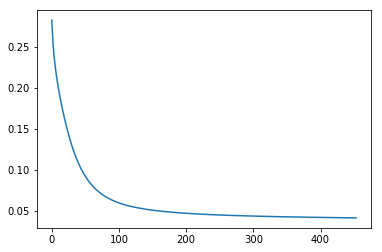

In [9]:
%matplotlib inline

plt.figure()
plt.plot(errorHist)
plt.show()

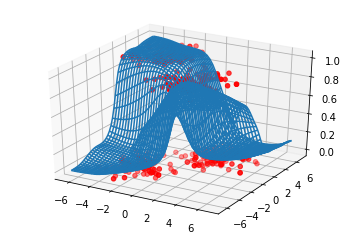

In [10]:
## VISUALIZAÇÃO DA CLASSIFICAÇÃO ##
%matplotlib qt5

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(X_train[0,:].min()-1, X_train[0,:].max()+1, 50)
y = np.linspace(X_train[0,:].min()-1, X_train[0,:].max()+1, 50)

xx, yy = np.meshgrid(x, y)
data = np.vstack([xx.ravel(), yy.ravel()])

z = brain.forward(data)[-1]
zz = z.reshape(xx.shape)

ax.plot_wireframe(xx,yy,zz)
ax.scatter3D(X_train[0,:],X_train[1,:], y_train, c="Red")

plt.show()

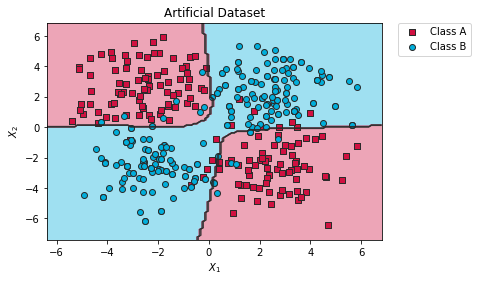

In [8]:
## VISUALIZAÇÃO DA CLASSIFICAÇÃO ##
%matplotlib inline

plt.figure()

x = np.arange(X_train[0,:].min()-1, X_train[0,:].max()+1, .1)
y = np.arange(X_train[1,:].min()-1, X_train[1,:].max()+1, .1)

xx, yy = np.meshgrid(x, y)
data = np.vstack([xx.ravel(), yy.ravel()])

z = brain.forward(data)[-1]
z = (z > 0.5).astype(int)
zz = z.reshape(xx.shape)

a_class = np.where(y_train == 1)
b_class = np.where(y_train == 0)

plt.title("Artificial Dataset"); plt.xlabel("$X_1$"); plt.ylabel("$X_2$")

plt.contour(xx, yy, zz, colors="#2A2A2A", linewidths=.5)
plt.contourf(xx, yy, zz, levels=range(-1,2), colors=["#00aedb60", "#d1114160"])

plt.scatter(X_train[0,a_class], X_train[1,a_class], marker="s", color="#d11141", edgecolor="#2A2A2A", label="Class A")
plt.scatter(X_train[0,b_class], X_train[1,b_class], marker="o", color="#00aedb", edgecolor="#2A2A2A", label="Class B")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()